## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs. 

You have several choices here: 

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [219]:
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab2_DL/sonnets.txt

with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()
    
TEXT_START = 45
TEXT_END = -368
text = text[TEXT_START : TEXT_END]
assert len(text) == 2616

In [88]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt

with open('onegin.txt', 'r') as iofile:
     text = iofile.readlines()

text = [x.replace('\t\t', '') for x in text]

--2021-12-13 15:25:11--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 262521 (256K) [text/plain]
Сохранение в: «onegin.txt»

onegin.txt          100%[===================>] 256,37K  --.-KB/s    за 0,1s    

2021-12-13 15:25:11 (2,44 MB/s) - «onegin.txt» сохранён [262521/262521]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [132]:
if not os.path.exists('skrip.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab2_DL/sonnets.txt

with open('skrip.txt', 'r') as iofile:
    text = iofile.readlines()


In [133]:
rows = text 
rows = [el.lower() for el in rows]
#rows = [row for row in rows if len(row) > 15]
#rows = [row for row in rows if len(row) < 60]

#rows = [row.strip() + '\n' for row in rows]

In [134]:
len(rows)

343

max length = 70


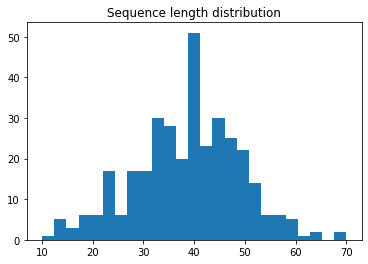

In [135]:
import matplotlib.pyplot as plt

MAX_LENGTH = max(map(len, rows))
print("max length =", MAX_LENGTH)

plt.title('Sequence length distribution')
plt.hist(list(map(len, rows)),bins=25);

In [131]:
# Выглядит так будто нужно убрать все строки длинной меньше 20
r = [row for row in rows if len(row) > 10]
r = [row for row in rows if len(row) < 50]
print(r)

['«мой дядя самых честных правил,\n', 'когда не в шутку занемог,\n', 'он уважать себя заставил\n', 'и лучше выдумать не мог.\n', 'его пример другим наука;\n', 'но, боже мой, какая скука\n', 'с больным сидеть и день и ночь,\n', 'не отходя ни шагу прочь!\n', 'какое низкое коварство\n', 'полуживого забавлять,\n', 'ему подушки поправлять,\n', 'печально подносить лекарство,\n', 'вздыхать и думать про себя:\n', 'когда же черт возьмет тебя!»\n', 'так думал молодой повеса,\n', 'летя в пыли на почтовых,\n', 'всевышней волею зевеса\n', 'наследник всех своих родных. —\n', 'друзья людмилы и руслана!\n', 'с героем моего романа\n', 'без предисловий, сей же час\n', 'позвольте познакомить вас:\n', 'онегин, добрый мой приятель,\n', 'родился на брегах невы,\n', 'где, может быть, родились вы\n', 'или блистали, мой читатель;\n', 'там некогда гулял и я:\n', 'но вреден север для меня\n', 'служив отлично-благородно,\n', 'долгами жил его отец,\n', 'давал три бала ежегодно\n', 'и промотался наконец.\n', 'судьб

539
max length = 159


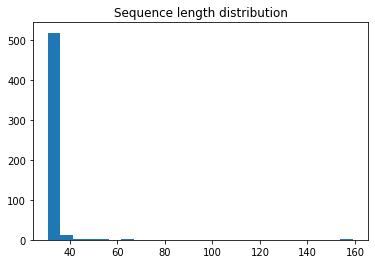

In [234]:
rows = [row for row in rows if len(row) > 30]
print(len(rows))
MAX_LENGTH = max(map(len, rows))
print("max length =", MAX_LENGTH)

plt.title('Sequence length distribution')
plt.hist(list(map(len, rows)),bins=25);

In [225]:
r = [row for row in rows if len(row) > 60]
print(r)

['    leese but their show; their substance still lives sweet.\n', "    and night doth nightly make grief's length seem stronger.\n", '  then--churls--their thoughts, although their eyes were kind,\n', '  sweet thief, whence didst thou steal thy sweet that smells,\n', '    bear thine eyes straight, though thy proud heart go wide.\n']


In [136]:
# Join all the strings into one and lowercase it
# Put result into variable text.

# Your great code here
text = ''.join(text)
text = text.lower()
assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')

AssertionError: Are you sure you have concatenated all the strings?

### Data loading: "Евгений Онегин"


In [ ]:
""" !wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
    
with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()
    
text = [x.replace('\t\t', '') for x in text] """

" !wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt\n    \nwith open('onegin.txt', 'r') as iofile:\n    text = iofile.readlines()\n    \ntext = [x.replace('\t\t', '') for x in text] "

In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [ ]:
# Join all the strings into one and lowercase it
# Put result into variable text.
# Your great code here


Put all the characters, that you've seen in the text, into variable `tokens`.

In [137]:
tokens = sorted(set(text))
tokens

['\n',
 ' ',
 '!',
 '"',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '5',
 '6',
 '7',
 '9',
 ':',
 ';',
 '?',
 '[',
 ']',
 'b',
 'c',
 'd',
 'e',
 'g',
 'i',
 'l',
 'm',
 'o',
 'p',
 'r',
 's',
 't',
 'v',
 'w',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё',
 '–',
 '—']

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [138]:
# dict <index>:<char>
# Your great code here
token_to_idx = {char: index for index, char in enumerate(tokens)}
# dict <char>:<index>
idx_to_token = {token_to_idx[char]: char for char in token_to_idx}
# Your great code here

In [139]:
print(len(idx_to_token))
print(token_to_idx)

73
{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, ',': 7, '-': 8, '.': 9, '0': 10, '1': 11, '2': 12, '3': 13, '5': 14, '6': 15, '7': 16, '9': 17, ':': 18, ';': 19, '?': 20, '[': 21, ']': 22, 'b': 23, 'c': 24, 'd': 25, 'e': 26, 'g': 27, 'i': 28, 'l': 29, 'm': 30, 'o': 31, 'p': 32, 'r': 33, 's': 34, 't': 35, 'v': 36, 'w': 37, 'а': 38, 'б': 39, 'в': 40, 'г': 41, 'д': 42, 'е': 43, 'ж': 44, 'з': 45, 'и': 46, 'й': 47, 'к': 48, 'л': 49, 'м': 50, 'н': 51, 'о': 52, 'п': 53, 'р': 54, 'с': 55, 'т': 56, 'у': 57, 'ф': 58, 'х': 59, 'ц': 60, 'ч': 61, 'ш': 62, 'щ': 63, 'ъ': 64, 'ы': 65, 'ь': 66, 'э': 67, 'ю': 68, 'я': 69, 'ё': 70, '–': 71, '—': 72}


*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

In [140]:
from random import sample
import torch, torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os

%matplotlib inline

In [141]:
def to_matrix(rows, max_len=None, dtype='int32', batch_first = True, pad = None):
    """Casts a list of rows into rnn-digestable matrix"""
    pad = pad or token_to_idx[' ']
    max_len = max_len or max(map(len, rows))
    rows_ix = np.zeros([len(rows), max_len], dtype) + pad

    for i in range(len(rows)):
        line_ix = [token_to_idx[c] for c in rows[i]]
        rows_ix[i, :len(line_ix)] = line_ix
        
    if not batch_first: # convert [batch, time] into [time, batch]
        rows_ix = np.transpose(rows_ix)

    return rows_ix

In [142]:
import torch, torch.nn as nn
# Your code here
x = torch.tensor([4, 3, 2, 1, 0])
matrix = nn.functional.one_hot(x, num_classes=6)
matrix = torch.FloatTensor(matrix, dtype=torch.long)
print(matrix)
example = nn.Linear(6,8)
example(matrix)

#example = nn.Embedding(5,5)
#example(x)

TypeError: new() received an invalid combination of arguments - got (Tensor, dtype=torch.dtype), but expected one of:
 * (*, torch.device device)
      didn't match because some of the keywords were incorrect: dtype
 * (torch.Storage storage)
 * (Tensor other)
 * (tuple of ints size, *, torch.device device)
 * (object data, *, torch.device device)


In [125]:
m = nn.Linear(20, 30)
input = torch.randn(5, 20)
print(input)
output = m(input)
print(output.size())

tensor([[ 0.3065,  1.5642,  0.0604,  0.5262, -0.0346,  0.4862,  1.4341, -1.4006,
         -1.1434,  0.6198, -2.2112,  0.0315,  1.0614, -0.6001, -0.4615,  1.6660,
          0.6815, -1.7336,  0.4644, -1.0134],
        [-0.4994, -1.6204, -0.1808,  1.0256, -1.8092, -1.6643,  1.0051, -0.3206,
          0.5702,  1.4396, -2.0318, -1.9874,  1.6561,  0.7313, -0.2159,  0.6609,
         -2.2242, -0.1733,  1.3368, -0.0559],
        [-0.9161, -1.7792,  0.8920,  0.8524,  0.7195,  1.7543, -1.3426, -1.6925,
          1.9008,  0.5012, -1.2543, -1.1587,  0.7562,  2.0524,  0.8988, -0.5017,
         -1.8057, -0.9382, -0.4696,  1.2173],
        [-1.0332, -2.5490,  0.1986,  0.7077, -0.6472,  1.7407,  0.6369,  0.5715,
          2.0625, -0.3540, -1.0090, -1.6268,  0.4487, -0.2669,  1.4270,  0.6782,
         -0.4169, -0.7157,  0.4820, -0.6731],
        [-0.0838,  0.5607,  0.9612,  1.7178,  2.1641,  0.6472, -1.3195, -1.2034,
          0.8764, -1.8199, -0.3046, -1.7141, -2.0603, -0.3382, -0.2434,  0.2796,
      

Plot the loss function (axis X: number of epochs, axis Y: loss function).

In [144]:
# Your plot code here
num_tokens = 73
class RNN(nn.Module):
    def __init__(self, num_tokens=num_tokens, emb_size=16, rnn_num_units=64, dropout=.5):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.RNN(
            input_size = emb_size,
            hidden_size = rnn_num_units,
            batch_first = True,
            num_layers = 2,
            dropout = dropout
        )
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, hidden_state):
        
        h_seq, hidden_state = self.rnn(self.emb(x), hidden_state)
        next_logits = self.hid_to_logits(h_seq)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp, hidden_state

In [145]:
model = RNN(emb_size=32)
opt = torch.optim.Adam(model.parameters())
history = []

criterion = nn.NLLLoss()

In [146]:
batch_ix = to_matrix(sample(rows, 16), max_len=60)

ValueError: cannot copy sequence with size 70 to array axis with dimension 60

In [147]:
BATCH_SIZE = 16

for i in range(5000):
    batch_ix = to_matrix(sample(rows, BATCH_SIZE), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

    hidden_state = torch.randn(2, BATCH_SIZE, 64)
    logp_seq = model(batch_ix, hidden_state)[0]
    
    loss = criterion(
        logp_seq[:, :-1].contiguous().view(-1, num_tokens),
        batch_ix[:, 1:].contiguous().view(-1)
        )
    
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i + 1) % 100 == 0:
        
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

In [250]:
def generate_sample(char_rnn, seed_phrase=' Hello', max_length=MAX_LENGTH, temperature=1.0):
    '''
    ### Disclaimer: this is an example function for text generation.
    ### You can either adapt it in your code or create your own function
    
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs, 
        smaller temperature converges to the single most likely output.
        
    Be careful with the model output. This model waits logits (not probabilities/log-probabilities)
    of the next symbol.
    '''
    
    x_sequence = [token_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([[x_sequence]], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)
    
    #feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        print(x_sequence[:, -1].shape, hid_state.shape)
        out, hid_state = char_rnn(x_sequence[:, i], hid_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        print(x_sequence.shape, x_sequence, hid_state.shape)
        out, hid_state = char_rnn(x_sequence[:, -1], hid_state)
        # Be really careful here with the model output
        p_next = F.softmax(out / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        print(p_next.shape, len(tokens))
        next_ix = np.random.choice(len(tokens), p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        print(x_sequence.shape, next_ix.shape)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [148]:
def generate_sample(model, seed_phrase=' ', max_length=MAX_LENGTH, temperature=1.0):
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    
    hidden_state = torch.randn(2, 1, 64)
    if len(seed_phrase) > 1:
        _, hidden_state = model(x_sequence[:, :-1], hidden_state)
    
    #start generating
    for _ in range(max_length - len(seed_phrase)):
        logp_next, hidden_state = model(x_sequence[:, -1].view(1, 1), hidden_state)
        logp_next = logp_next[:, -1]
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()[0]
        
        # sample next token and push it back into x_sequence
        next_ix = np.random.choice(num_tokens,p=p_next)
        next_ix = torch.tensor([[next_ix]], dtype=torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [149]:
# An example of generated text.
generate_sample(model, temperature=.1, max_length = 70, seed_phrase='любовь это')

'любовь это ность это моя вечеринка\n                                   '

In [151]:
print(generate_sample(model, temperature=.2, max_length = 70, seed_phrase='любовь это'))
print(generate_sample(model, temperature=.2, max_length = 70, seed_phrase='не то чтобы'))
print(generate_sample(model, temperature=.2, max_length = 70, seed_phrase='а потому'))
print(generate_sample(model, temperature=.2, max_length = 70, seed_phrase='и в заключении'))

любовь это нало всех из бодалы в поресть на всё на ведь это мое ведь м
не то чтобы поти сень все видели видерка.
                            
а потому своришьшини в подень это моя вечерить их лишом стрости не в п
и в заключении в подни ворорать будко не видерин в престо ты в поре не


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

In [152]:
# Your beautiful code here
num_tokens = 73
class CharRNNLoop(nn.Module):
    def __init__(self, num_tokens=num_tokens, emb_size=16, rnn_num_units=64, dropout=.7):
        super(self.__class__, self).__init__()
        self.emb = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.LSTM(
            input_size = emb_size,
            hidden_size = rnn_num_units,
            batch_first = True,
            num_layers = 2, 
            dropout = dropout
        )
        self.hid_to_logits = nn.Linear(rnn_num_units, num_tokens)
        
    def forward(self, x, hidden=None):
        assert isinstance(x.data, torch.LongTensor)
        if hidden:
            h, c = hidden
            h_seq, (h, c) = self.rnn(self.emb(x), (h, c))
        else :
            h_seq, (h, c) = self.rnn(self.emb(x))
        next_logits = self.hid_to_logits(h_seq)
        next_logp = F.log_softmax(next_logits, dim=-1)
        return next_logp, (h, c)

In [153]:
model = CharRNNLoop(emb_size=32, rnn_num_units=128)
opt = torch.optim.Adam(model.parameters())
history = []
criterion = nn.NLLLoss()
loss = criterion(logp_seq[:, :-1].contiguous().view(-1, num_tokens),
                 batch_ix[:, 1:].contiguous().view(-1))


In [154]:
BATCH_SIZE = 16

for i in range(4000):
    batch_ix = to_matrix(sample(rows, BATCH_SIZE), max_len=MAX_LENGTH)
    batch_ix = torch.tensor(batch_ix, dtype=torch.int64)

    hidden_state = torch.randn(2, BATCH_SIZE, 64)
    logp_seq, _ = model(batch_ix)
    
    loss = criterion(logp_seq[:, :-1].contiguous().view(-1, num_tokens),
                 batch_ix[:, 1:].contiguous().view(-1))
    
    loss.backward()
    opt.step()
    opt.zero_grad()
    
    history.append(loss.data.numpy())
    if (i + 1) % 100 == 0:
        
        clear_output(True)
        plt.plot(history,label='loss')
        plt.legend()
        plt.show()

assert np.mean(history[:10]) > np.mean(history[-10:]), "RNN didn't converge."

In [155]:
def generate_sample(char_rnn, seed_phrase=' ', max_length=MAX_LENGTH, temperature=1.0):
    '''
    The function generates text given a phrase of length at least SEQ_LENGTH.
    :param seed_phrase: prefix characters. The RNN is asked to continue the phrase
    :param max_length: maximum output length, including seed_phrase
    :param temperature: coefficient for sampling.  higher temperature produces more chaotic outputs,
                        smaller temperature converges to the single most likely output
    '''
    
    x_sequence = [token_to_idx[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    
    hidden_state = None
    
    if len(seed_phrase) > 1:
        _, hidden_state = char_rnn(x_sequence[:, :-1])
    
    for _ in range(max_length - len(seed_phrase)):
        logp_next, hidden_state = char_rnn(x_sequence[:, -1].view(1, 1), hidden_state)
        logp_next = logp_next[:, -1]
        p_next = F.softmax(logp_next / temperature, dim=-1).data.numpy()[0]
        
        next_ix = np.random.choice(num_tokens, p= p_next)
        next_ix = torch.tensor([[next_ix]], dtype = torch.int64)
        x_sequence = torch.cat([x_sequence, next_ix], dim=1)
        
    return ''.join([tokens[ix] for ix in x_sequence.data.numpy()[0]])

In [170]:
print(generate_sample(model, temperature=.1, max_length = 50, seed_phrase='любовь это'))
print(generate_sample(model, temperature=.1, max_length = 50, seed_phrase=' это моя вечеринка '))
print(generate_sample(model, temperature=.3, max_length = 50, seed_phrase='нахуй '))
print(generate_sample(model, temperature=.4, max_length = 50, seed_phrase='не уверен '))
print(generate_sample(model, temperature=.1, max_length = 50, seed_phrase='суки'))

любовь этом и делел о ды питаетим
                
 это моя вечеринка и забытнисть из водние
        
нахуй их конины, млел, в еёпки из нина вонии
     
не уверен и за тал сарытись - это эза дари.
      
суки, ведь это моя вечеринка.
                    


In [158]:
print(generate_sample(model, temperature=0.5, max_length = 100))
print(generate_sample(model, temperature=1, max_length = 100))
print(generate_sample(model, temperature=1, max_length = 100))
print(generate_sample(model, temperature=1, max_length = 100))

 онам туб в рогним заза мы и делав.
                                                                
 bдного на сумре гая, повсто бадля в эгомле.
                                                       
 bololems!w
                                                                                        
 все:, ет мапки зрядоч
                                                                             


Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [ ]:
# Text generation with different temperature values here

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [ ]:
# Saving and loading code here

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a> 
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)